Information Theory Basics

In [4]:
import numpy as np
from scipy.stats import entropy

# Joint probability distribution
P_xy = np.array([
    [1/8, 1/16, 1/32, 1/32],
    [1/16, 1/8, 1/32, 1/32],
    [1/16, 1/16, 1/16, 1/16],
    [1/4, 0, 0, 0]
])

# Marginal distributions
P_x = np.sum(P_xy, axis=1)  # Summing over columns gives P(X)
P_y = np.sum(P_xy, axis=0)  # Summing over rows gives P(Y)

# Entropies H(X) and H(Y)
H_x = entropy(P_x, base=2)
H_y = entropy(P_y, base=2)

# Conditional entropy H(X|Y)
H_x_given_y = 0
for j in range(P_y.size):
    if P_y[j] > 0:
        H_x_given_y += P_y[j] * entropy(P_xy[:, j] / P_y[j], base=2)

# Conditional entropy H(Y|X)
H_y_given_x = 0
for i in range(P_x.size):
    if P_x[i] > 0:
        H_y_given_x += P_x[i] * entropy(P_xy[i, :] / P_x[i], base=2)

# Mutual information I(X, Y)
I_xy = H_x - H_x_given_y  # Equivalent to H(Y) - H(Y|X)

# Print results
print(f"H(X) = {H_x:.4f}")
print(f"H(Y) = {H_y:.4f}")
print(f"H(X|Y) = {H_x_given_y:.4f}")
print(f"H(Y|X) = {H_y_given_x:.4f}")
print(f"Is H(X|Y) = H(Y|X)? {'Yes' if np.isclose(H_x_given_y, H_y_given_x) else 'No, 1.625 <> 1.375'}")
print(f"Does H(X) - H(X|Y) = H(Y) - H(Y|X)? {'Yes, H(X) - H(X|Y) = 2 - 1.625 = 0.375. H(Y) - H(Y|X) = 1.75 - 1.375 = 0.375' if np.isclose(H_x - H_x_given_y, H_y - H_y_given_x) else 'No'}")
print(f"Mutual Information I(X, Y) = {I_xy:.4f}")


H(X) = 2.0000
H(Y) = 1.7500
H(X|Y) = 1.6250
H(Y|X) = 1.3750
Is H(X|Y) = H(Y|X)? No, 1.625 <> 1.375
Does H(X) - H(X|Y) = H(Y) - H(Y|X)? Yes, H(X) - H(X|Y) = 2 - 1.625 = 0.375. H(Y) - H(Y|X) = 1.75 - 1.375 = 0.375
Mutual Information I(X, Y) = 0.3750


Task 1

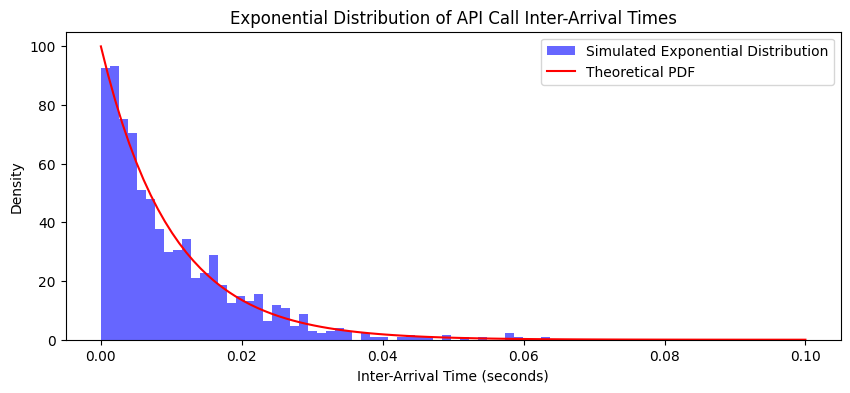

Simulated Mean Inter-Arrival Time: 0.0098 seconds
Expected Mean Inter-Arrival Time: 0.0100 seconds


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Poisson process rate (calls per second)
lambda_rate = 100

# Simulate 1000 interarrival times using an exponential distribution
inter_arrival_times = np.random.exponential(scale=1/lambda_rate, size=1000)

# Histogram of inter-arrival times
plt.figure(figsize=(10,4))
plt.hist(inter_arrival_times, bins=50, density=True, alpha=0.6, color='b', label='Simulated Exponential Distribution')

# Theoretical Exponential PDF
t = np.linspace(0, 0.1, 100)
plt.plot(t, lambda_rate * np.exp(-lambda_rate * t), 'r-', label='Theoretical PDF')

plt.xlabel("Inter-Arrival Time (seconds)")
plt.ylabel("Density")
plt.title("Exponential Distribution of API Call Inter-Arrival Times")
plt.legend()
plt.show()

# Print mean inter-arrival time
print(f"Simulated Mean Inter-Arrival Time: {np.mean(inter_arrival_times):.4f} seconds")
print(f"Expected Mean Inter-Arrival Time: {1/lambda_rate:.4f} seconds")


Task 2

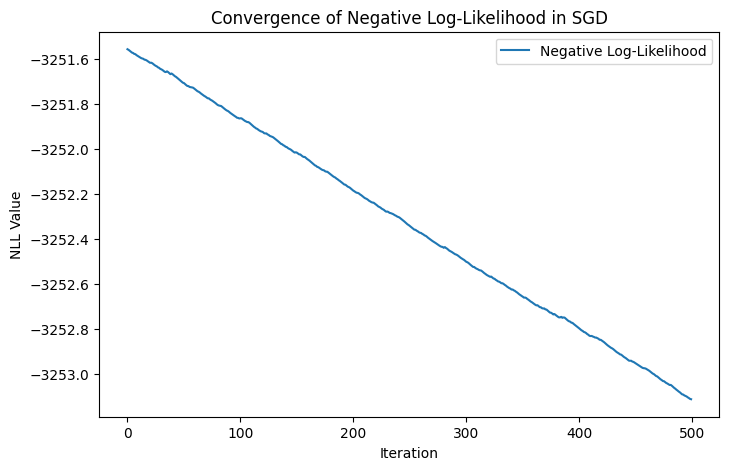

Estimated lambda after 500 iterations: 37.1172
True lambda: 100


In [2]:
import numpy as np
import matplotlib.pyplot as plt

# True rate
lambda_true = 100

# Generate sample inter-arrival times from Exponential distribution
np.random.seed(42)
num_samples = 1000
inter_arrival_times = np.random.exponential(scale=1/lambda_true, size=num_samples)

# Stochastic Gradient Descent (SGD) to estimate lambda
learning_rate = 0.01  # Step size
num_iterations = 500  # Number of updates
lambda_est = np.random.rand() * 200  # Initial random guess for lambda

nll_values = []  # Store NLL values

for i in range(num_iterations):
    # Pick a random sample for stochastic update
    t_i = np.random.choice(inter_arrival_times)

    # Compute gradient: -1/λ + t_i
    gradient = -1 / lambda_est + t_i

    # Update lambda estimate
    lambda_est -= learning_rate * gradient

    # Compute NLL for logging
    nll = -num_samples * np.log(lambda_est) + lambda_est * np.sum(inter_arrival_times)
    nll_values.append(nll)

# Plot the NLL over iterations
plt.figure(figsize=(8, 5))
plt.plot(nll_values, label="Negative Log-Likelihood")
plt.xlabel("Iteration")
plt.ylabel("NLL Value")
plt.title("Convergence of Negative Log-Likelihood in SGD")
plt.legend()
plt.show()

# Output estimated lambda
print(f"Estimated lambda after {num_iterations} iterations: {lambda_est:.4f}")
print(f"True lambda: {lambda_true}")


a) Estimated parameter lambda after 500 iterations is 37.1172
b) Plot shown above

Linear Regression and SGD

In [19]:
#Dataset Generation

import numpy as np
import matplotlib.pyplot as plt

# Set random seed
np.random.seed(42)

# Number of examples
m = 100

# Generate random input features
X = 2 * np.random.rand(m, 1)

# True parameters (for data generation)
true_w = np.array([4, 3])

# Generate outputs with noise
y = true_w[0] + true_w[1] * X + np.random.randn(m, 1)

# Add bias term (column of ones) to input features
X_b = np.c_[np.ones((m, 1)), X]


In [15]:
#SGD Algorithm

def compute_loss(X_b, y, w, alpha):
    m = len(y)
    predictions = X_b.dot(w)
    error = predictions - y
    mse = (1 / (2 * m)) * np.sum(error ** 2)
    reg_term = (alpha / (2 * m)) * np.sum(w[1:] ** 2)  # Exclude bias term from regularization
    return mse + reg_term

def stochastic_gradient_descent(X_b, y, learning_rate, alpha, epochs, batch_size):
    m, n = X_b.shape
    w = np.random.randn(n, 1)  # Initialize weights randomly
    loss_history = []

    for epoch in range(epochs):
        indices = np.random.permutation(m)
        X_b_shuffled = X_b[indices]
        y_shuffled = y[indices]

        for i in range(0, m, batch_size):
            X_i = X_b_shuffled[i:i + batch_size]
            y_i = y_shuffled[i:i + batch_size]
            predictions = X_i.dot(w)
            error = predictions - y_i
            gradients = (1 / batch_size) * X_i.T.dot(error)
            gradients[1:] += (alpha / m) * w[1:]  # Apply regularization (excluding bias term)
            w = w - learning_rate * gradients

        loss = compute_loss(X_b, y, w, alpha)
        loss_history.append(loss)

    return w, loss_history


In [14]:
#Hyperparameters

learning_rate = 0.1
alpha = 0.01  # Regularization parameter
epochs = 50
batch_size = 10


In [16]:
#Training the model

w_final, loss_history = stochastic_gradient_descent(X_b, y, learning_rate, alpha, epochs, batch_size)


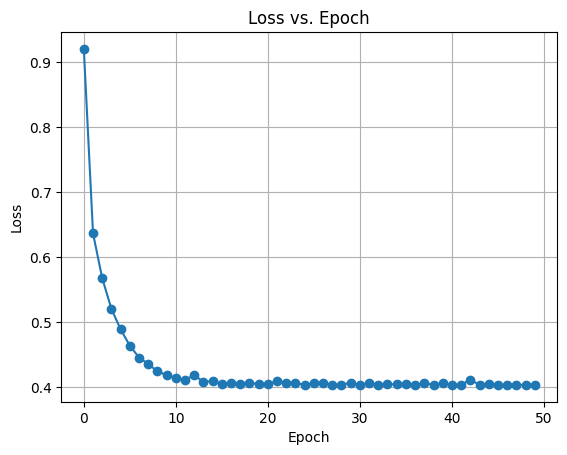

In [17]:
#Plotting convergence of the loss

plt.plot(range(epochs), loss_history, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs. Epoch')
plt.grid(True)
plt.show()


In [18]:
#Printing final model parameters

print(f"Final model parameters (weights):\n{w_final}")


Final model parameters (weights):
[[4.22240917]
 [2.76853713]]
